# Задание, которое в форме для ДЗ - настроить архитектуру и гипер-параметры нейронной сети так, чтобы достичь максимальной точности на аугментированной тестовой выборке.

---

1. Import Packages
---

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model

2. Load Datasets

---

In [97]:
num_classes = 10

def load_dataset_8x8():
  digits = datasets.load_digits()
  x_train, x_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size = 0.3, shuffle = True)
  return x_train, y_train, x_test, y_test

def load_dataset_28x28():
  (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
  return x_train, y_train, x_test, y_test

3. Data Preparation

---

In [98]:
x_train, y_train, x_test, y_test = load_dataset_28x28()

x_train = x_train.astype("float32") / 255
x_test  = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input_shape = (x_train.shape[1:])

print('Image shape:', input_shape)
print('X:', x_train.shape, x_test.shape)
print('Y:', y_train.shape, y_test.shape)

Image shape: (28, 28, 1)
X: (60000, 28, 28, 1) (10000, 28, 28, 1)
Y: (60000, 10) (10000, 10)


4. CNN Model

---

In [99]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=(input_shape)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 2304)              0         
                                                                 
 dense_15 (Dense)            (None, 10)              

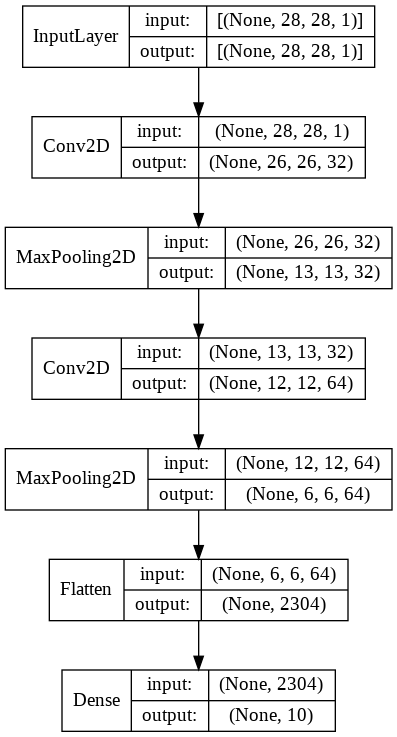

In [100]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

# 5. Training without Augmentation

## 5.1. Training

In [101]:
batch_size = 64
epochs = 30

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3)

Epoch 1/30
657/657 [==============================] - 5s 6ms/step - loss: 0.2814 - accuracy: 0.9177 - val_loss: 0.0949 - val_accuracy: 0.9721
Epoch 2/30
657/657 [==============================] - 4s 6ms/step - loss: 0.0719 - accuracy: 0.9778 - val_loss: 0.0769 - val_accuracy: 0.9762
Epoch 3/30
657/657 [==============================] - 5s 7ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0569 - val_accuracy: 0.9831
Epoch 4/30
657/657 [==============================] - 5s 8ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0558 - val_accuracy: 0.9841
Epoch 5/30
657/657 [==============================] - 5s 7ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.0534 - val_accuracy: 0.9843
Epoch 6/30
657/657 [==============================] - 3s 5ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0553 - val_accuracy: 0.9841
Epoch 7/30
657/657 [==============================] - 4s 6ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0484 - val_accuracy: 0.9856
Epoch 

## 5.2. Show Training Process

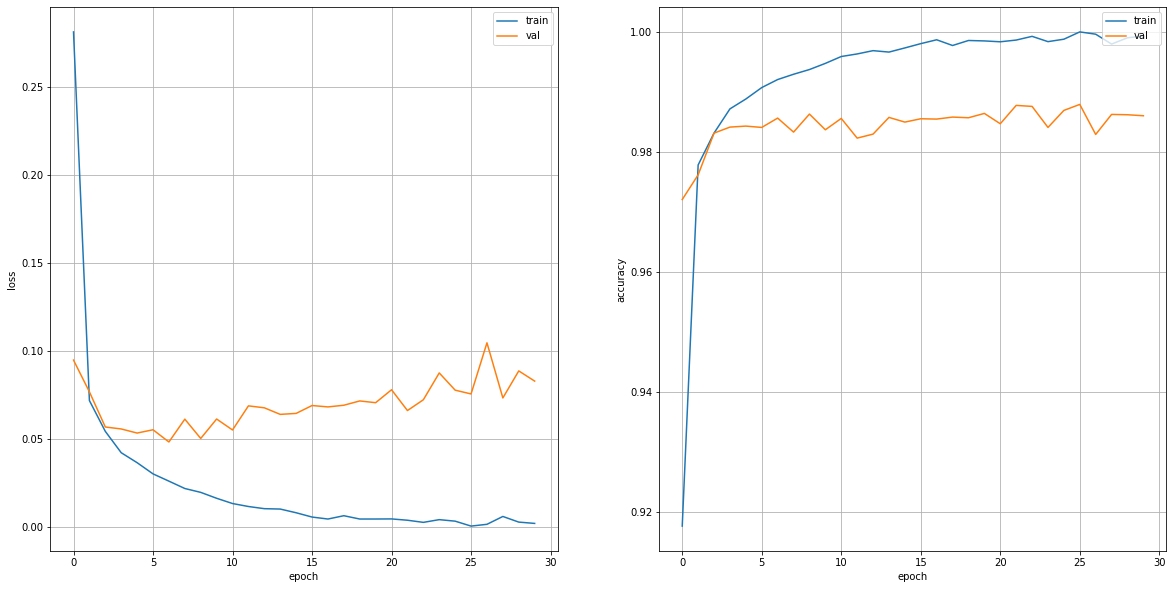

In [102]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10));

ax[0].plot(history.history['loss']);
ax[0].plot(history.history['val_loss']);
ax[0].set_ylabel('loss');

ax[1].plot(history.history['accuracy']);
ax[1].plot(history.history['val_accuracy']);
ax[1].set_ylabel('accuracy');

for a in ax:
  a.set_xlabel('epoch');
  a.legend(['train', 'val'], loc='upper right');
  a.grid();

# 5.3. Print Classification Metrics 

313/313 [==============================] - 1s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      1.00      0.99      5958
           3       1.00      0.99      1.00      6131
           4       1.00      0.99      0.99      5842
           5       1.00      0.99      1.00      5421
           6       1.00      0.99      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      0.99      1.00      5851
           9       0.99      1.00      0.99      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000


Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1

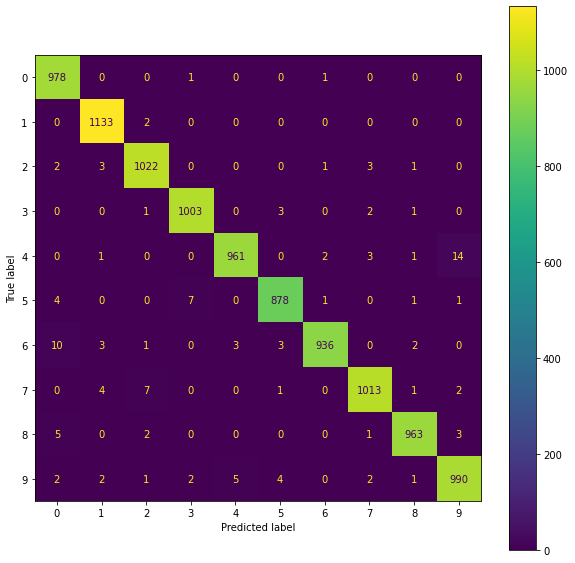

In [103]:
y_train_hat = model.predict(x_train).argmax(axis=-1);
y_train_ = y_train.argmax(axis=-1); # need to change format for applying sklearn classification_report()

y_test_hat = model.predict(x_test).argmax(axis=-1);
y_test_ = y_test.argmax(axis=-1); # need to change format for applying sklearn classification_report()

print("Classification report:\n{}\n".format(metrics.classification_report(y_train_, y_train_hat)));
print("Classification report:\n{}\n".format(metrics.classification_report(y_test_, y_test_hat)));

print("Confusion matrix");

fig, ax = plt.subplots(figsize=(10, 10));
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test_, y_test_hat), display_labels=np.arange(num_classes));
disp.plot(ax = ax);
pass

# 6. AUGMENTATION

## 6.1. Import Additional Packages

In [104]:
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display 

%pip install mpld3
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins

def show_mpld3_images(images, figsize=(16, 8)):
  fig, ax = plt.subplots(1, len(images), figsize=figsize)

  if len(images) == 1:
    ax = [ax] # need to consider ax as iterable object

  for a, image in zip(ax, images):
    if image.ndim == 2 or (image.ndim == 3 and image.shape[2] == 1): # grayscale
      a.imshow(image.reshape(image.shape[0:2]), cmap='gray', vmin=0, vmax=255)
    else:
      a.imshow(image)

  return mpld3.display()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
show_mpld3_images([x_test[1] * 255])

## 6.2. Visualization of Augmentation Techniques and Testing the Model 

In [106]:
# decrease brightness
x_test_new = x_test * 0.3
show_mpld3_images([x_test[0] * 255, x_test_new[0] * 255])

In [107]:
y_test_hat = model.predict(x_test_new).argmax(axis=-1)
print("Classification report:\n{}\n".format(metrics.classification_report(y_test_, y_test_hat)))

313/313 [==============================] - 1s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      1.00      0.98      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.96      0.97       982
           5       0.97      0.98      0.98       892
           6       1.00      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000




In [108]:
# increase brightness
x_test_new = x_test * 1.7
show_mpld3_images([x_test[0] * 255, x_test_new[0] * 255])

In [109]:
y_test_hat = model.predict(x_test_new).argmax(axis=-1)
print("Classification report:\n{}\n".format(metrics.classification_report(y_test_, y_test_hat)))

313/313 [==============================] - 1s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000




In [110]:
# gaussian noise
x_test_new = x_test + np.random.normal(0, 0.2, x_test.shape) 
show_mpld3_images([x_test[0] * 255, x_test_new[0] * 255])

In [111]:
y_test_hat = model.predict(x_test_new).argmax(axis=-1)
print("Classification report:\n{}\n".format(metrics.classification_report(y_test_, y_test_hat)))

313/313 [==============================] - 1s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      0.99      0.97      1135
           2       0.92      0.98      0.95      1032
           3       0.99      0.94      0.96      1010
           4       0.91      0.99      0.95       982
           5       0.93      0.97      0.95       892
           6       1.00      0.92      0.96       958
           7       0.98      0.92      0.95      1028
           8       0.92      0.98      0.95       974
           9       0.98      0.85      0.91      1009

    accuracy                           0.95     10000
   macro avg       0.96      0.95      0.95     10000
weighted avg       0.96      0.95      0.95     10000




In [112]:
# salt & pepper 
salt_and_pepper = np.random.rand(x_test.shape[0], x_test.shape[1], x_test.shape[2], x_test.shape[3])
x_test_new = x_test.copy()
x_test_new[salt_and_pepper > 0.95] = 1 # salt
x_test_new[salt_and_pepper < 0.05] = 0 # papper
show_mpld3_images([x_test[0] * 255, x_test_new[0] * 255])

In [113]:
y_test_hat = model.predict(x_test_new).argmax(axis=-1)
print("Classification report:\n{}\n".format(metrics.classification_report(y_test_, y_test_hat)))

313/313 [==============================] - 1s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       980
           1       0.88      0.92      0.90      1135
           2       0.66      0.98      0.79      1032
           3       0.96      0.86      0.91      1010
           4       0.79      0.97      0.87       982
           5       0.87      0.93      0.90       892
           6       0.99      0.83      0.90       958
           7       0.95      0.84      0.89      1028
           8       0.92      0.85      0.88       974
           9       0.99      0.68      0.81      1009

    accuracy                           0.88     10000
   macro avg       0.90      0.88      0.88     10000
weighted avg       0.90      0.88      0.88     10000




In [114]:
# translation
x_test_new = x_test.copy()

shift_matrix = np.float32([[1, 0, 2], [0, 1, 2]])

for i, image in enumerate(x_test_new):
  x_test_new[i] = np.expand_dims(cv.warpAffine(image, shift_matrix, (image.shape[1], image.shape[0])), -1)

show_mpld3_images([x_test[0] * 255, x_test_new[0] * 255])

In [115]:
y_test_hat = model.predict(x_test_new).argmax(axis=-1)
print("Classification report:\n{}\n".format(metrics.classification_report(y_test_, y_test_hat)))

313/313 [==============================] - 1s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       980
           1       0.75      0.81      0.78      1135
           2       0.79      0.91      0.85      1032
           3       0.78      0.94      0.85      1010
           4       0.77      0.67      0.72       982
           5       0.88      0.89      0.89       892
           6       0.95      0.63      0.76       958
           7       0.86      0.87      0.87      1028
           8       0.86      0.72      0.78       974
           9       0.75      0.78      0.76      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.82      0.81     10000




In [116]:
# rotation
x_test_new = x_test.copy()

rows, cols = x_test.shape[1:3]
rot_center = ((cols-1) / 2.0, (rows-1) / 2.0)
rot_matrix = cv.getRotationMatrix2D(rot_center, 30, 1)

for i, image in enumerate(x_test_new):
  x_test_new[i] = np.expand_dims(cv.warpAffine(image, rot_matrix, (cols,rows)), -1)

show_mpld3_images([x_test[0] * 255, x_test_new[0] * 255])

In [117]:
y_test_hat = model.predict(x_test_new).argmax(axis=-1)
print("Classification report:\n{}\n".format(metrics.classification_report(y_test_, y_test_hat)))

313/313 [==============================] - 1s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       980
           1       0.84      0.99      0.91      1135
           2       0.90      0.73      0.81      1032
           3       0.98      0.85      0.91      1010
           4       0.80      0.79      0.80       982
           5       0.89      0.85      0.87       892
           6       0.89      0.88      0.88       958
           7       0.71      0.63      0.67      1028
           8       0.91      0.75      0.82       974
           9       0.73      0.93      0.82      1009

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000




## 6.3. Creation Single Augmented Dataset

In [118]:
x_train_aug = x_train.copy()
x_test_aug = x_test.copy()

y_train_aug = y_train.copy()
y_test_aug = y_test.copy()

def add_ds(x_aug, x_new, y_aug, y):
  x_aug = np.append(x_aug, x_new, axis = 0)
  y_aug = np.append(y_aug, y, axis = 0)
  return x_aug, y_aug

def augment_dataset(x, y):
  x_aug = x.copy()
  y_aug = y.copy()

  # brightness -
  x_aug, y_aug = add_ds(x_aug, x * 0.3, y_aug, y)

  # brightness +
  x_aug, y_aug = add_ds(x_aug, x * 1.7, y_aug, y)

  # gaussian noise
  x_aug, y_aug = add_ds(x_aug, (x + np.random.normal(0, 0.1, x.shape)), y_aug, y)

  # salt & paper 
  salt_and_pepper = np.random.rand(x.shape[0], x.shape[1], x.shape[2], x.shape[3])
  x_new = x.copy()
  x_new[salt_and_pepper > 0.95] = 1
  x_new[salt_and_pepper < 0.05] = 0
  x_aug, y_aug = add_ds(x_aug, x_new, y_aug, y)

  # translation
  x_new = x.copy()
  shift_matrix = np.float32([[1, 0, 2], [0, 1, 2]])

  for i, image in enumerate(x):
    x_new[i] = np.expand_dims(cv.warpAffine(image, shift_matrix, (image.shape[1], image.shape[0])), -1)
  
  x_aug, y_aug = add_ds(x_aug, x_new, y_aug, y)

  # rotation
  x_new = x.copy()
  rows, cols = x.shape[1:3]
  rot_center = ((cols-1) / 2.0, (rows-1) / 2.0)
  rot_matrix = cv.getRotationMatrix2D(rot_center, 30, 1)

  for i, image in enumerate(x):
    x_new[i] = np.expand_dims(cv.warpAffine(image, rot_matrix, (cols,rows)), -1)

  x_aug, y_aug = add_ds(x_aug, x_new, y_aug, y)

  return x_aug, y_aug

x_train_aug, y_train_aug = augment_dataset(x_train, y_train)
x_test_aug, y_test_aug = augment_dataset(x_test, y_test)

print(x_train_aug.shape, x_test_aug.shape)
print(y_train_aug.shape, y_test_aug.shape)

(420000, 28, 28, 1) (70000, 28, 28, 1)
(420000, 10) (70000, 10)


In [119]:
show_mpld3_images([x_train_aug[0] * 255, x_train_aug[1*60000] * 255])

2188/2188 [==============================] - 4s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6860
           1       0.91      0.96      0.93      7945
           2       0.88      0.94      0.91      7224
           3       0.95      0.94      0.95      7070
           4       0.90      0.90      0.90      6874
           5       0.94      0.94      0.94      6244
           6       0.97      0.89      0.93      6706
           7       0.92      0.89      0.91      7196
           8       0.95      0.90      0.92      6818
           9       0.90      0.90      0.90      7063

    accuracy                           0.92     70000
   macro avg       0.93      0.92      0.92     70000
weighted avg       0.93      0.92      0.92     70000


Confusion matrix


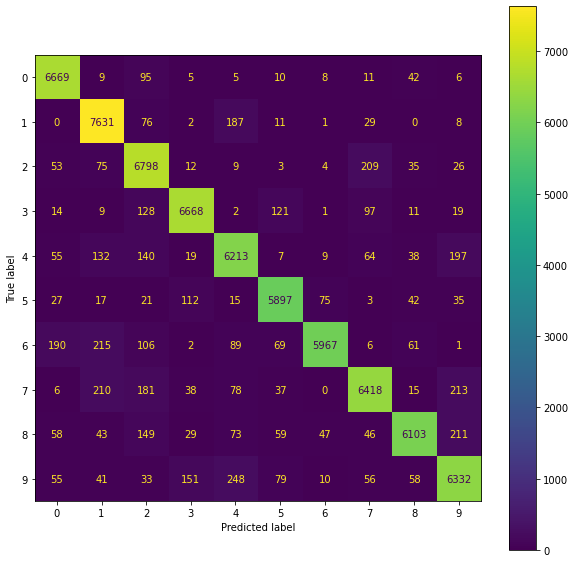

In [120]:
# test the initial model
y_test_hat = model.predict(x_test_aug).argmax(axis=-1)
y_test_aug_ = y_test_aug.argmax(axis=-1) # need to change format for applying sklearn classification_report()

print("Classification report:\n{}\n".format(metrics.classification_report(y_test_aug_, y_test_hat)))

print("Confusion matrix")

fig, ax = plt.subplots(figsize=(10, 10))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test_aug_, y_test_hat), display_labels=np.arange(num_classes))
disp.plot(ax = ax)
pass

# 7. Training with Augmentation

In [121]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=(input_shape)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 5, 5, 64)          16448     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 2, 2, 64)       

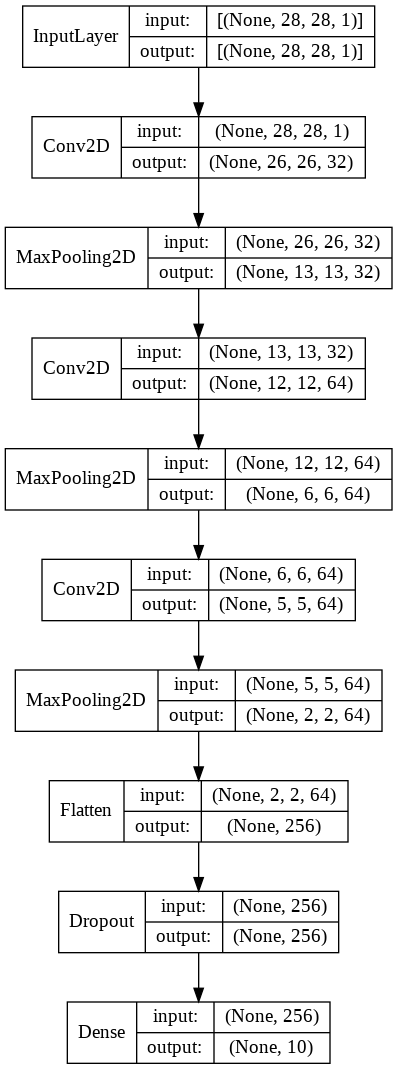

In [122]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [123]:
batch_size = 64*7
epochs = 30

history = model.fit(x_train_aug, y_train_aug, batch_size=batch_size, epochs=epochs, validation_split=0.3)

Epoch 1/30
657/657 [==============================] - 10s 14ms/step - loss: 0.4739 - accuracy: 0.8637 - val_loss: 0.7493 - val_accuracy: 0.7705
Epoch 2/30
657/657 [==============================] - 8s 12ms/step - loss: 0.1592 - accuracy: 0.9545 - val_loss: 0.5724 - val_accuracy: 0.8253
Epoch 3/30
657/657 [==============================] - 8s 12ms/step - loss: 0.1231 - accuracy: 0.9636 - val_loss: 0.5161 - val_accuracy: 0.8451
Epoch 4/30
657/657 [==============================] - 8s 12ms/step - loss: 0.1049 - accuracy: 0.9685 - val_loss: 0.4595 - val_accuracy: 0.8627
Epoch 5/30
657/657 [==============================] - 8s 12ms/step - loss: 0.0934 - accuracy: 0.9719 - val_loss: 0.4267 - val_accuracy: 0.8689
Epoch 6/30
657/657 [==============================] - 8s 12ms/step - loss: 0.0857 - accuracy: 0.9741 - val_loss: 0.4196 - val_accuracy: 0.8773
Epoch 7/30
657/657 [==============================] - 9s 14ms/step - loss: 0.0791 - accuracy: 0.9761 - val_loss: 0.4051 - val_accuracy: 0.881

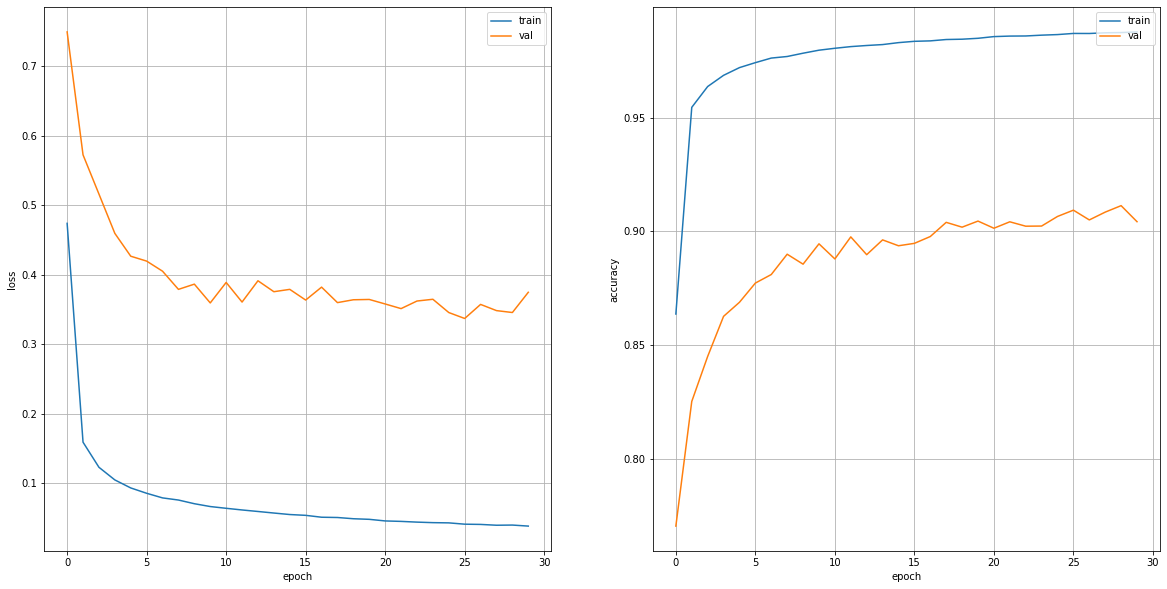

In [124]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))

ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_ylabel('loss')

ax[1].plot(history.history['accuracy'])
ax[1].plot(history.history['val_accuracy'])
ax[1].set_ylabel('accuracy')

for a in ax:
  a.set_xlabel('epoch')
  a.legend(['train', 'val'], loc='upper right')
  a.grid()

2188/2188 [==============================] - 5s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6860
           1       0.97      0.99      0.98      7945
           2       0.98      0.94      0.96      7224
           3       0.98      0.97      0.98      7070
           4       0.96      0.98      0.97      6874
           5       0.97      0.97      0.97      6244
           6       0.97      0.97      0.97      6706
           7       0.93      0.96      0.94      7196
           8       0.96      0.97      0.97      6818
           9       0.97      0.94      0.96      7063

    accuracy                           0.97     70000
   macro avg       0.97      0.97      0.97     70000
weighted avg       0.97      0.97      0.97     70000


Confusion matrix


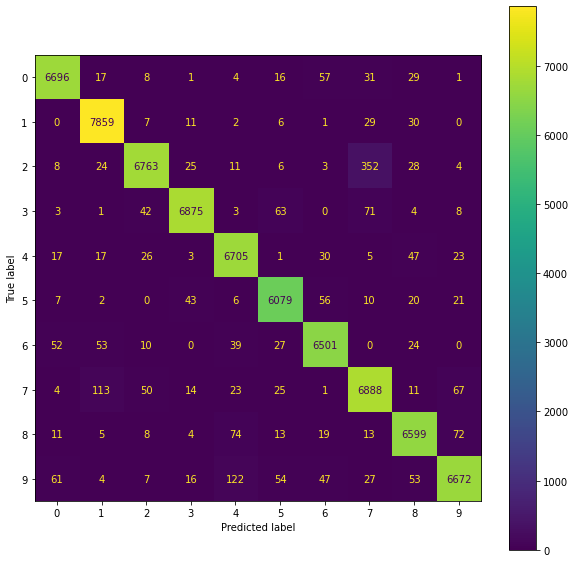

In [125]:
y_test_hat = model.predict(x_test_aug).argmax(axis=-1)
y_test_aug_ = y_test_aug.argmax(axis=-1) # need to change format for applying sklearn classification_report()

print("Classification report:\n{}\n".format(metrics.classification_report(y_test_aug_, y_test_hat)))

print("Confusion matrix")

fig, ax = plt.subplots(figsize=(10, 10))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test_aug_, y_test_hat), display_labels=np.arange(num_classes))
disp.plot(ax = ax)
pass

# 8. Saving the Model 

# 8.1. Saving

In [126]:
model.save('model.h5')

# 8.2. Testing

In [127]:
loaded_model = load_model('model.h5') 

In [128]:
y_test_hat = loaded_model.predict(x_test_aug).argmax(axis=-1)
y_test_ = y_test.argmax(axis=-1) # need to change format for applying sklearn classification_report()

print("Classification report:\n{}\n".format(metrics.classification_report(y_test_aug_, y_test_hat)))

2188/2188 [==============================] - 4s 2ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6860
           1       0.97      0.99      0.98      7945
           2       0.98      0.94      0.96      7224
           3       0.98      0.97      0.98      7070
           4       0.96      0.98      0.97      6874
           5       0.97      0.97      0.97      6244
           6       0.97      0.97      0.97      6706
           7       0.93      0.96      0.94      7196
           8       0.96      0.97      0.97      6818
           9       0.97      0.94      0.96      7063

    accuracy                           0.97     70000
   macro avg       0.97      0.97      0.97     70000
weighted avg       0.97      0.97      0.97     70000


